In [305]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from useful_functions import *
import seaborn as sns
from config_path import MS_DATA_PATH
print(MS_DATA_PATH)

../data/ms


In [306]:


df = pd.read_csv(f'{MS_DATA_PATH}/220316_ghost_nrt_filtered.tsv', sep='\t')
design_matrix = pd.read_csv(f'{MS_DATA_PATH}/design_matrix_group_de_early_time_points_subtypes.tsv', sep='\t')

GroupOneCols = design_matrix[design_matrix['Group'] == 1]['Sample'].values
GroupTwoCols = design_matrix[design_matrix['Group'] == 2]['Sample'].values

print(len(GroupOneCols))
print(len(GroupTwoCols))

30
42


### Peptide distribution in samples

In [196]:
nr_unique_proteins = len(df['Protein'].unique())
print(f'# unique proteins: {nr_unique_proteins} ')

df['PeptideCount1'] = df[GroupOneCols].count(axis=1)
df['PeptideCount2'] = df[GroupTwoCols].count(axis=1)
df['PeptideCountSum'] = df['PeptideCount1']+df['PeptideCount2']
df['IntensitySum1'] = df[GroupOneCols].sum(axis=1)
df['IntensitySum2'] = df[GroupTwoCols].sum(axis=1)
df['IntensityMean1'] = df[GroupOneCols].mean(axis=1)
df['IntensityMean2'] = df[GroupTwoCols].mean(axis=1)
df['FC'] = df['IntensityMean1'] / df['IntensityMean2']
df['IntensitySum'] = df['IntensitySum1'] + df['IntensitySum2']


# unique proteins: 1039 


    Protein  PeptideCount  Group   i
215  P04114   3899.000000      1   0
195  P02768   3756.000000      1   1
101  P01024   3782.000000      1   2
100  P01023   3059.000000      1   3
369  P0C0L4   2499.000000      1   4
..      ...           ...    ...  ..
85   P00739    268.571429      2  95
447  P15169    268.571429      2  96
754  P69905    237.142857      2  97
525  P25311    241.428571      2  98
657  P48740    230.000000      2  99

[200 rows x 4 columns]
Sum1:  107377
Sum2:  154532


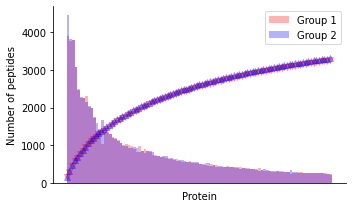

In [303]:
# Histogram of peptides per protein
protein_peptide_count = df.groupby('Protein', as_index=False).sum()[['Protein','PeptideCount1','PeptideCount2','PeptideCountSum']]

groupratio = len(GroupOneCols)/len(GroupTwoCols)
protein_peptide_count = protein_peptide_count.sort_values('PeptideCountSum',ascending=False)[0:100]
df1 = protein_peptide_count[['Protein','PeptideCount1']]
df2 = protein_peptide_count[['Protein', 'PeptideCount2']]
df1 = df1.rename(columns={'PeptideCount1':'PeptideCount'})
df2 = df2.rename(columns={'PeptideCount2':'PeptideCount'})
df1['Group'] = 1
df2['Group'] = 2
df2['PeptideCount'] = df2['PeptideCount'] * groupratio
df1['i'] = range(len(df1.index))
df2['i'] = range(len(df2.index))
df_new = pd.concat([df1,df2])
print(df_new)
plt.bar(x=df1['i'].values, height=df1['PeptideCount'].values,align='edge', alpha=0.3, width=1.0,color='red', label='Group 1')
plt.bar(x=df2['i'].values, height=df2['PeptideCount'].values,align='edge', alpha=0.3,width=1.0, color='blue', label='Group 2')

reduction_factor =  25
plt.rcParams["figure.figsize"] = (5,3)
plt.scatter(x=range(len(df1['Protein'])), y=df1['PeptideCount'].cumsum()/reduction_factor, alpha=0.3, marker='v', color='red')
plt.scatter(x=range(len(df1['Protein'])), y=df2['PeptideCount'].cumsum()/reduction_factor,alpha=0.3,  marker = '^', color='blue')
print('Sum1: ', df['PeptideCount1'].sum())
print('Sum2: ', df['PeptideCount2'].sum())
plt.xticks([])
plt.xlabel('Protein')
plt.ylabel('Number of peptides')
plt.legend()
sns.despine(top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.savefig('../plots/general/PeptideCount.jpg', dpi=300)

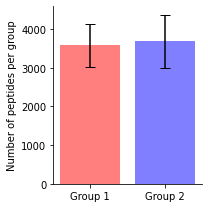

In [288]:
# Peptides per protein
group1_peptides = []
for col in GroupOneCols:
    group1_peptides.append(df[col].count())
group1_mean =  np.mean(group1_peptides)
group1_sd = np.std(group1_peptides)
group2_peptides = []
for col in GroupTwoCols:
    group2_peptides.append(df[col].count())
group2_mean = np.mean(group2_peptides)
group2_sd = np.std(group2_peptides)
plt.rcParams["figure.figsize"] = (3,3)
plt.bar(x = ['Group 1', 'Group 2'], height = [group1_mean,group2_mean], 
        yerr=[group1_sd, group2_sd], 
        capsize=5, 
        color=['red', 'blue'], 
        alpha=0.5,)
plt.ylabel('Number of peptides per group')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()
plt.savefig('../plots/general/PeptidesPerGroupBar.jpg', dpi=300)

/tmp/ipykernel_17439/2825480333.py:10: RuntimeWarning: divide by zero encountered in log10
  df_new['logI'] = [np.log10(x) for x in df_new['IntensitySum']]


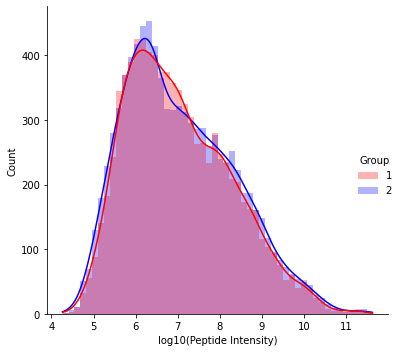

In [291]:
df1 = df[['PeptideSequence','IntensitySum1']]
df2 = df[['PeptideSequence', 'IntensitySum2']]
df1 = df1.rename(columns={'IntensitySum1':'IntensitySum'})
df2 = df2.rename(columns={'IntensitySum2':'IntensitySum'})
df1['Group'] = 1
df2['Group'] = 2

df_new = pd.concat([df1,df2])
df_new.reset_index(inplace=True)
df_new['logI'] = [np.log10(x) for x in df_new['IntensitySum']]

sns.displot(data=df_new, kde=True, x= 'logI', hue='Group', edgecolor=None, palette=['red','blue'], alpha=0.3)
plt.xlabel('log10(Peptide Intensity)')
plt.tight_layout()
plt.savefig('../plots/general/PeptideIntensityHistogram.jpg', dpi=300)

### Differential expression
Peptide Level:

/home/erikh/master-thesis/my-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/erikh/master-thesis/my-venv/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/erikh/master-thesis/my-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/erikh/master-thesis/my-venv/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/erikh/master-thesis/my-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=

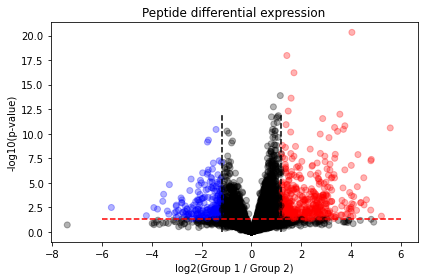

In [217]:
df['pvalue'] = df.apply(lambda x: get_p_value(x, GroupOneCols, GroupTwoCols), axis=1)
df['Log2FoldChange1-2'] = [np.log2(x) for x in df['FC']]
df['logPValue'] = y=[-np.log(val) for val in df['pvalue'].values]
df['color'] = df.apply(lambda x: color_if_significant(x), axis=1)
plt.scatter(x=df['Log2FoldChange1-2'].values , y=df['logPValue'].values, color=df['color'].values, alpha=0.3)
plt.vlines(1.2, ymin=0, ymax=12, color='k', linestyle='dashed')
plt.vlines(-1.2, ymin=0, ymax=12,color='k', linestyle='dashed')
plt.hlines(1.31, xmin=-6, xmax=6, color='red', linestyle='dashed')
plt.title('Peptide differential expression')
plt.ylabel('-log10(p-value)')
plt.xlabel('log2(Group 1 / Group 2)')
plt.tight_layout()
plt.savefig('../plots/general/PeptideVolcano.jpg', dpi=300)

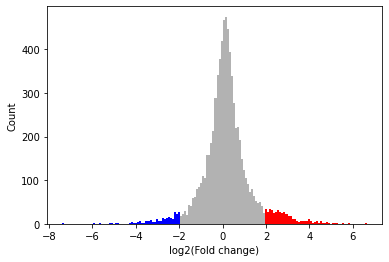

In [227]:
g = sns.histplot(df['Log2FoldChange1-2'].values, color='black',alpha=0.3, linewidth=0)
for p in range(len(g.patches)):
    x,_ = g.patches[p].xy
    if x < -2:
        g.patches[p].set_facecolor('blue')
    elif x > 2:
        g.patches[p].set_facecolor('red')
plt.xlabel('log2(Fold change)')
plt.savefig('../plots/general/PeptideFCHistogram.jpg', dpi=300)

### Protein level

## DPKS
---

In [321]:
from dpks.quant_matrix import QuantMatrix

quant_matrix = QuantMatrix(
    quantification_file=f"{MS_DATA_PATH}/220316_ghost_nrt_filtered.tsv",
    design_matrix_file=f"{MS_DATA_PATH}/design_matrix_group_de_early_time_points_subtypes.tsv"
)

compare_df = (
        quant_matrix
        .filter() # filter for q-values (removes rows with low q value (peptides), Q = 0.01) and removes decoys
        .normalize(method="mean", use_rt_sliding_window_filter = True) # best type of normalization is RT-sliding window
        .quantify(method="maxlfq") # play around with minimum_subgroups (default is set 1)
    ).compare_groups(
        method='linregress',
        group_a=1,
        group_b=2,
        min_samples_per_group = 2, 
        level='protein',
    ).to_df()
compare_df

/home/erikh/master-thesis/my-venv/lib/python3.9/site-packages/dpks/normalization.py:116: RuntimeWarning: Mean of empty slice
  sample_means = np.nanmean(X, axis=0)


,Protein,Group1Mean,Group2Mean,Log2FoldChange1-2,PValues1-2,Group1RepCounts,Group2RepCounts,CorrectedPValue,TM_M2012_010,TM_M2012_011,...,TM_M2012_177,TM_M2012_178,TM_M2012_182,TM_M2012_183,TM_M2012_186,TM_M2012_188,TM_M2012_189,TM_M2012_196,TM_M2012_197,TM_M2012_198
0,P06396,21.288717,21.226708,0.062010,0.694861,30,42,0.721447,21.690603,20.691873,...,20.419413,21.028937,21.542064,21.509333,21.198022,21.245511,21.200419,23.029393,23.389134,23.470304
1,P10643,21.516173,21.613422,-0.097249,0.503560,30,42,0.625305,21.677649,21.190349,...,21.893203,21.188014,21.371173,21.436145,21.356409,21.040272,21.362647,21.331875,21.524378,21.930228
2,P03952,20.936229,20.612498,0.323731,0.045767,30,42,0.149304,21.023477,20.770036,...,20.505599,20.608387,20.970957,20.752389,21.042518,20.957229,21.163873,22.332772,22.704704,22.773377
3,P02750,23.510573,23.954318,-0.443745,0.003362,30,42,0.023420,22.807610,23.269826,...,23.784981,24.566548,24.806581,24.787613,22.859750,22.901881,23.686287,24.103840,23.764547,24.052968
4,Q04756,19.586920,18.838137,0.748783,0.000072,30,41,0.001191,19.657972,19.115191,...,18.220235,18.721893,18.931209,18.973254,19.296811,18.608288,19.034313,20.708523,20.283616,20.454671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,P01275,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,P16104,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.966682
1036,O00194,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,Q6R327,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


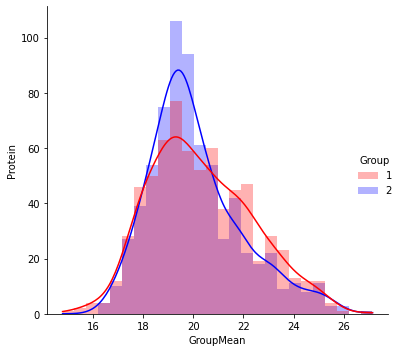

In [326]:
df1 = compare_df[['Protein','Group1Mean']]
df2 = compare_df[['Protein', 'Group2Mean']]
df1 = df1.rename(columns={'Group1Mean':'GroupMean'})
df2 = df2.rename(columns={'Group2Mean':'GroupMean'})
df1['Group'] = 1
df2['Group'] = 2

df_new = pd.concat([df1,df2])
df_new.reset_index(inplace=True)

sns.displot(data=df_new, kde=True, x= 'GroupMean', hue='Group', edgecolor=None, palette=['red','blue'], alpha=0.3)
plt.ylabel('Protein')
plt.tight_layout()
plt.savefig('../plots/general/ProteinMeanAbundanceHistogram.jpg', dpi=300)

In [311]:
def color_if_significant(row):
    if row['logPValue'] > 1.31 and row['Log2FoldChange1-2'] < -1.2:
        return 'blue'
    if row['logPValue'] > 1.31 and row['Log2FoldChange1-2'] > 1.2:
        return 'red'
    return 'black'

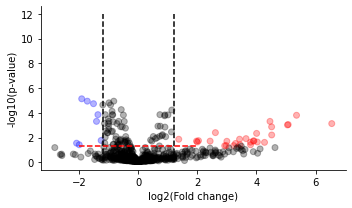

In [312]:
compare_df['logPValue'] = -1.0 * np.log10(compare_df['CorrectedPValue'])
compare_df['color'] = compare_df.apply(lambda x: color_if_significant(x), axis=1)
plt.scatter(x=compare_df['Log2FoldChange1-2'], y=compare_df['logPValue'], color=compare_df['color'].values, alpha=0.3)

plt.vlines(1.2, ymin=0, ymax=12, color='black', linestyle='dashed')
plt.vlines(-1.2, ymin=0, ymax=12,color='black', linestyle='dashed')
plt.hlines(1.31, xmin=-2, xmax=2, color='red', linestyle='dashed')
plt.ylabel('-log10(p-value)')
plt.xlabel('log2(Fold change)')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()
plt.savefig('../plots/general/ProteinVolcano.jpg', dpi=300)

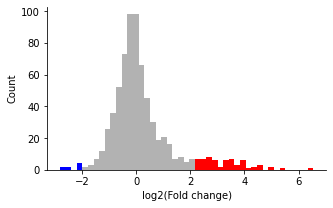

In [313]:
g = sns.histplot(compare_df['Log2FoldChange1-2'].values, color='black',alpha=0.3, linewidth=0)
for p in range(len(g.patches)):
    x,_ = g.patches[p].xy
    if x < -2:
        g.patches[p].set_facecolor('blue')
    elif x > 2:
        g.patches[p].set_facecolor('red')
plt.xlabel('log2(Fold change)')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('../plots/general/ProteinFCHistogram.jpg', dpi=300)

In [314]:
quant_matrix = QuantMatrix(
    quantification_file=f"{MS_DATA_PATH}/220316_ghost_nrt_filtered.tsv",
    design_matrix_file=f"{MS_DATA_PATH}/design_matrix_group_de_early_time_points_subtypes.tsv"
)

compare_df = (quant_matrix.filter().normalize(method="mean", use_rt_sliding_window_filter = True)).compare_groups(
        method='linregress',
        group_a=1,
        group_b=2,
        min_samples_per_group = 2, 
        level='precursor',
    ).to_df()
compare_df

/home/erikh/master-thesis/my-venv/lib/python3.9/site-packages/dpks/normalization.py:116: RuntimeWarning: Mean of empty slice
  sample_means = np.nanmean(X, axis=0)


,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,PrecursorId,Group1Mean,Group2Mean,...,TM_M2012_177,TM_M2012_178,TM_M2012_182,TM_M2012_183,TM_M2012_186,TM_M2012_188,TM_M2012_189,TM_M2012_196,TM_M2012_197,TM_M2012_198
0,KGGVASGFK,2,0,P06396,685.798,0.000000,0.0,KGGVASGFK_2,18.989198,19.164162,...,NaN,19.740344,19.376169,18.952661,NaN,18.350601,18.080521,NaN,22.042868,21.591780
1,MHVLHC(UniMod:4)QGR,3,0,P10643,702.533,0.000000,0.0,MHVLHC(UniMod:4)QGR_3,21.624927,21.320765,...,NaN,20.893909,21.495066,21.461510,NaN,19.871855,NaN,NaN,22.272574,21.819652
2,TGAVSGHSLK,2,0,P03952,702.600,0.000000,0.0,TGAVSGHSLK_2,19.388518,19.111947,...,NaN,NaN,19.318540,NaN,NaN,18.059342,NaN,NaN,21.196409,20.760405
3,LHLEGNK,2,0,P02750,716.333,0.000000,0.0,LHLEGNK_2,22.247049,22.730798,...,NaN,23.663179,23.454860,23.264612,NaN,20.482940,NaN,NaN,22.767716,22.241429
4,MLHAC(UniMod:4)TSEGSAHR,4,0,Q04756,732.411,0.000000,0.0,MLHAC(UniMod:4)TSEGSAHR_4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13370,FDLGQDVIDFTGHALALYR,2,0,P31150,6037.035,0.000214,0.0,FDLGQDVIDFTGHALALYR_2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13371,VFDEFKPLVEEPQNLIKQNC(UniMod:4)ELFEQLGEYKFQNALLVR,4,0,P02768,6037.100,0.000000,0.0,VFDEFKPLVEEPQNLIKQNC(UniMod:4)ELFEQLGEYKFQNALL...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13372,EFYLFPTVFDENESLLLEDNIR,3,0,P00450,6037.695,0.000000,0.0,EFYLFPTVFDENESLLLEDNIR_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13373,DMALTAFVLISLQEAK,2,0,P01024,6038.920,0.000000,0.0,DMALTAFVLISLQEAK_2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


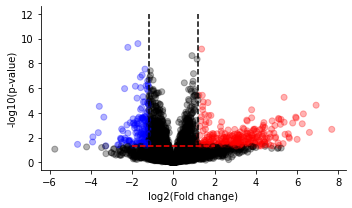

In [315]:
compare_df['logPValue'] = -1.0 * np.log10(compare_df['PValues1-2'])
compare_df['color'] = compare_df.apply(lambda x: color_if_significant(x), axis=1)
plt.scatter(x=compare_df['Log2FoldChange1-2'], y=compare_df['logPValue'], color=compare_df['color'].values, alpha=0.3)
plt.vlines(1.2, ymin=0, ymax=12, color='black', linestyle='dashed')
plt.vlines(-1.2, ymin=0, ymax=12,color='black', linestyle='dashed')
plt.hlines(1.31, xmin=-2, xmax=2, color='red', linestyle='dashed')
plt.ylabel('-log10(p-value)')
plt.xlabel('log2(Fold change)')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()
plt.savefig('../plots/general/PrecursorVolcano.jpg', dpi=300)

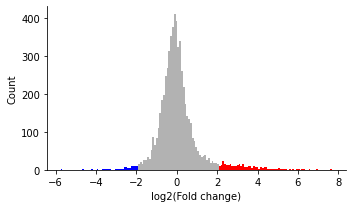

In [320]:
g = sns.histplot(compare_df['Log2FoldChange1-2'].values, color='black',alpha=0.3, linewidth=0)
for p in range(len(g.patches)):
    x,_ = g.patches[p].xy
    if x < -2:
        g.patches[p].set_facecolor('blue')
    elif x > 2:
        g.patches[p].set_facecolor('red')

plt.xlabel('log2(Fold change)')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()
plt.savefig('../plots/general/PrecursorFCHistogram.jpg',  dpi=300)